In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split,Subset
torch.manual_seed(1)


In [4]:
from sklearn.model_selection import train_test_split


In [5]:
data =pd.read_csv(os.path.join("Breast_cancer","data.csv"))

In [6]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [7]:
data=data.drop("id", axis=1)



In [8]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [9]:
data['diagnosis'] = data['diagnosis'].str.replace('M','0')
data['diagnosis'] = data['diagnosis'].str.replace('B','1')


In [10]:
data=data.drop("Unnamed: 32", axis=1)


In [11]:
train=data.drop("diagnosis", axis=1)

In [12]:
target = data["diagnosis"].astype(float)

In [13]:
from sklearn.preprocessing import StandardScaler


In [14]:
scaler = StandardScaler()

In [15]:
standered=scaler.fit_transform(train)

In [16]:
train=pd.DataFrame(standered)

In [17]:
class MyDataset(Dataset):

    def __init__(self):       
        
        self.features=train
        self.labels = target
    def __getitem__(self, i):
        feaures=self.features.iloc[i]
        target=self.labels[i]
        return torch.tensor(np.array(feaures)),torch.tensor(np.array(target))
    def __len__(self):
        return len(self.labels)

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

In [19]:
import torch.nn as nn
import torch 
import torch.nn.functional as f


class Net(nn.Module):
    def __init__(self,outNumber):
        super(Net,self).__init__()
        self.outNumber = outNumber
        
        
    
        self.fc0 = nn.Linear(
            in_features=30, out_features=100 ,bias=True)
        self.depth = 100
        self.linear_layers = []

        self.linear_layers = nn.ModuleList([nn.Linear(
            in_features=100, out_features=100, bias=True) for index in range(self.depth)])
        self.fc = nn.Linear(in_features=100, out_features=self.outNumber, bias=True)
        # self.activation = nn.sigmoid()
    def forward(self, x):
        out = self.fc0(x)
        residual = out
        for index, layer in enumerate(self.linear_layers):
            out = self.linear_layers[index](out)
            out = f.leaky_relu(out)
            # out = f.dropout(out, p=self.droup_out)
            if index % 3 == 0:
                out = out + residual
                residual = out
        out = self.fc(out)
        out = torch.nn.functional.sigmoid(out)
        out = torch.squeeze(out, dim=1)
        return out




In [113]:
net=Net(1)
net=net.cuda()

In [114]:
from sklearn import metrics

In [115]:
def get_accuracy(y_true, y_prob):
    accuracy = metrics.accuracy_score(y_true.cpu().detach().numpy(), y_prob.cpu().detach().numpy() > 0.5)
    return accuracy

In [136]:
dataset_ = MyDataset()
#dataset_ = Subset(dataset_, np.arange(1000000))
# Split into training and test
train_size = int(0.3 * len(dataset_))
test_size = len(dataset_) - train_size


trainset, testset = random_split(dataset_, [train_size, test_size])

# Dataloaders
trainloader = DataLoader(trainset, batch_size=100, shuffle=True)
testloader = DataLoader(testset, batch_size=100, shuffle=False)
criterion=nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=1.0E-6)


In [137]:
import torch # pytorch
from sklearn.preprocessing import LabelEncoder
import torch.optim as optim 
import numpy as np
import torch.nn as nn

class train_:
    def __init__(self,epochs,model,train_dl,val_dl,criterion,optimizer):
        self.model = model
        self.train_dl = train_dl
        self.val_dl = val_dl
        self.criterion = criterion
        self.optimizer = optimizer
        self.epochs = epochs
    def accuracy(self,y_prob,y_true):
        y_prob = y_prob > 0.5
        return (y_true == y_prob).sum().item() / y_true.size(0)    
   # def accuracy(self,predictions, labels):# accuracy function from the resulted predictions
    #    #accuracy = (torch.softmax(predictions, dim=1).argmax(dim=1) == labels).sum().float() / float( labels.size(0) )
     #   accuracy = ((predictions== labels).sum().float() / float( labels.size(0) ))
      #  return accuracy    
    
    def training(self):
        Max_Accu_Val = .0 # start with zero accuracy to compare the results
        lamda = torch.tensor(0.6).type(torch.float).requires_grad_() 
        lamda = torch.tensor(0.6,requires_grad=True, device="cuda")
        self.optimizer2 = optim.Adam([lamda], lr=1E-6)
        error = []
        acctest_=[]
        acctrain_=[]
        
        self.model = self.model.double()
        for e in range(self.epochs): # for every epoch
            CounterTrain =0 # initialize the values with zero, this used to calculate the number of  training epochs
            CounterVal =0  # this used as number of test epochs
            train_loss = 0.0 # initialize the training loss with zero
            TrainAccAll = 0.0 # the summed accuracy for the whole training epoch
            VallAccAll = 0.0 # the summed accuracy of the whole test epoch
            lossTrainAll = 0.0 # the summed loss for the whole training epoch
            lossValAll = 0.0 # the summed loss for the whole test epoch
            lossVarAll=0
            acctest=0
            countertest=0
            lossTestAll=0.0
            self.model.train() 
            
            # signal a training process
            for data, labels in self.train_dl: # for every input and output in train data loader
                self.model.train() 

                if torch.cuda.is_available(): # check if cuda is a vailable
                   data, labels = data.cuda(), labels.cuda() # feed the input and output to cuda
               
                self.optimizer.zero_grad() # zero the gradient, required by pytorch
               
                target = self.model(data.double()) # calculate the input
               #outnorm = [float(i)/max(out) for i in out]

                dataiter = iter(self.val_dl)
                inputsTest, labelsTest  = next(dataiter)
                labelsTest = labelsTest.to("cuda")
                inputsTest = inputsTest.to("cuda")
                self.model.eval() 
                targettest= self.model(inputsTest.double()) 
                
                acctest += self.accuracy(targettest, labelsTest)
                countertest+=1
                
                
                l1 =1# sum(p.abs().sum() for p in self.model.parameters())
                
                lossOriginal = self.criterion(target.double(), labels.double())
              
                loss =lossOriginal+lamda*l1
                x = (1/(labels-torch.sqrt(torch.abs(lossOriginal-lamda))+.0000001))-1
                varout = torch.abs(torch.var(-(x*x-1)/(x+.0000001)))
                loss.backward(retain_graph=True)# neural network backward calculations
                self.optimizer2.zero_grad()
                #var_=torch.abs(torch.var(out)-.1*torch.max(out))
                varout.backward()
                self.optimizer.step() 
                self.optimizer2.step()
                # optimize
                
                train_loss = lossOriginal.item()# sotre loss values
                TrainAcc = self.accuracy(target.double(),labels.double()) # calculate training accuracy
                CounterTrain+=1 # update training counter
                TrainAccAll +=TrainAcc # update training accuracy the whole epoch
                lossTrainAll += train_loss # update training loss the whole epoch
                #if CounterTrain%5==0:
                if CounterTrain%1==0:
                    print("lamda",lamda)
                    print(varout)
                    print("acc Test:", acctest/countertest)
                    print(e,'Training acc',TrainAccAll /CounterTrain,'loss',lossTrainAll/CounterTrain,CounterTrain*50)
                    #traced_cell = torch.jit.trace(self.model,data.double())
                    #traced_cell.save('./atrial_Fib_model.zip')
                    #print("Conerted!")
                
                    error.append(lossTrainAll/CounterTrain)
                    acctest_.append(acctest/countertest)
                    acctrain_.append(TrainAccAll/CounterTrain)   
        return acctest_,acctrain_
                    
                    

In [140]:
tr=train_(1000,net,trainloader,testloader,criterion,optimizer)#with lamda

In [141]:
test,tatin=tr.training()#without lamda

lamda tensor(0.6000, device='cuda:0', requires_grad=True)
tensor(0.9536, device='cuda:0', dtype=torch.float64, grad_fn=<AbsBackward0>)
acc Test: 0.92
0 Training acc 0.88 loss 0.6061690806430087 50
lamda tensor(0.6000, device='cuda:0', requires_grad=True)
tensor(0.9966, device='cuda:0', dtype=torch.float64, grad_fn=<AbsBackward0>)
acc Test: 0.92
0 Training acc 0.9257142857142857 loss 0.6000922706854006 100
lamda tensor(0.6000, device='cuda:0', requires_grad=True)
tensor(0.9801, device='cuda:0', dtype=torch.float64, grad_fn=<AbsBackward0>)
acc Test: 0.92
1 Training acc 0.9 loss 0.6053079071159355 50
lamda tensor(0.6000, device='cuda:0', requires_grad=True)
tensor(0.9564, device='cuda:0', dtype=torch.float64, grad_fn=<AbsBackward0>)
acc Test: 0.92
1 Training acc 0.9214285714285715 loss 0.6002943742191222 100
lamda tensor(0.6000, device='cuda:0', requires_grad=True)
tensor(0.9877, device='cuda:0', dtype=torch.float64, grad_fn=<AbsBackward0>)
acc Test: 0.92
2 Training acc 0.89 loss 0.601744

In [142]:
testno1,tatinon1=test,tatin

In [166]:
test.extend(testno1)

In [168]:
np.array(test).shape

(4000,)

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline




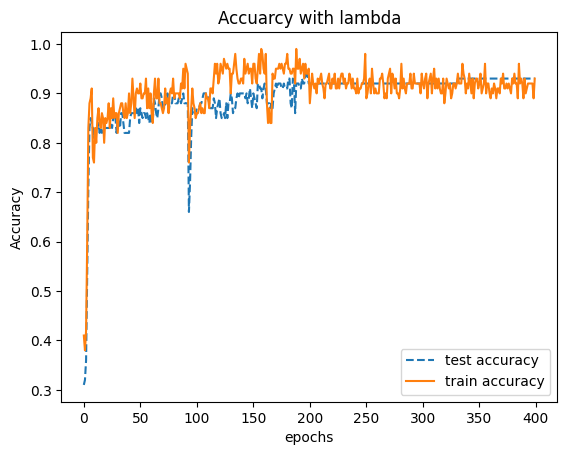

In [169]:
plt.title("Accuarcy with lambda")
plt.plot(test[0:-1:10],label="test accuracy",linestyle='dashed')
plt.plot(tatin[0:-1:10],label="train accuracy")
plt.legend(loc="lower right")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.show()

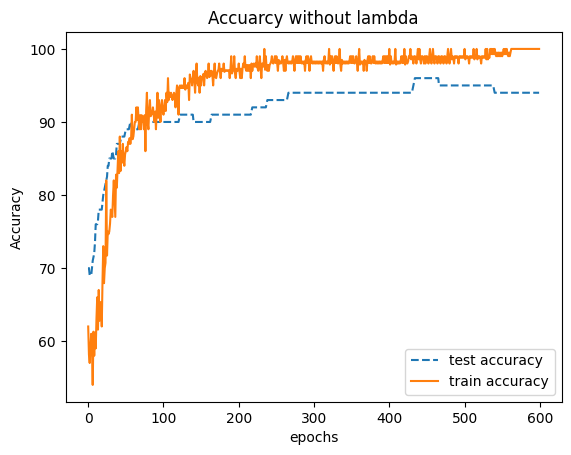

In [55]:
plt.title("Accuarcy without lambda")
plt.plot(np.array(test)*100,label="test accuracy",linestyle='dashed')
plt.plot(np.array(tatin)*100,label="train accuracy")
plt.legend(loc="lower right")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.show()